In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# model imports
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

### Coffee Production Dataset

In [2]:
# https://www.kaggle.com/code/firefortysix/geospatial-viz-of-global-coffee-production-in-2020/data
coffee_production = pd.read_csv('data/coffee-production-by-exporting-countries-1991-2020-ico.csv', 
                                encoding = "ISO-8859-1",
                                skip_blank_lines=True)
coffee_production.drop(columns='Type',inplace=True)
coffee_production.head()

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,1637137.716,1637609.604,2076201.252,1690018.716,1691522.82,1083612.132,1751804.58,1568880.24,2205651.198,...,3325704.612,2915509.734,3325080.072,3281337.984,3198286.014,3172235.256,3407290.704,3164389.074,3907847.982,3492642.762
1,Viet Nam,78617.280,86270.880,140426.820,181212.960,217896.54,238205.160,345148.86,418736.52,423103.320,...,1199999.994,1589976.666,1404126.342,1656586.884,1634431.314,1865402.514,1669150.572,2005949.940,1816984.488,1829229.864
2,Colombia,863760.000,1078823.820,896812.680,685345.320,777840.00,776281.080,646731.00,727349.76,652077.720,...,511359.564,459200.016,595616.670,727444.212,800000.610,840526.884,878063.358,829444.350,831957.720,846007.092
3,Indonesia,446482.980,509591.760,334168.680,404597.280,322072.68,274405.740,493235.04,457246.68,437757.300,...,547710.708,413335.398,784202.316,774056.958,656776.638,755128.506,692461.596,651138.918,577055.652,685976.550
4,Ethiopia,174567.060,175479.840,109510.260,178020.240,165763.80,189919.320,204446.52,183411.84,175663.500,...,333623.088,339024.594,367920.396,374546.634,382995.708,390898.524,428578.776,440803.992,450673.404,440605.974


In [3]:
# transposing dataframe and resetting index
coffee_production = coffee_production.set_index('Country').T
coffee_production.reset_index(inplace=True)

# adjusting index name, eliminating axis name, snakecasing columns
coffee_production.rename(columns={'index':'Year'},inplace=True)
coffee_production.rename_axis(None,axis=1,inplace=True)
coffee_production.columns = [col.lower().replace(' ','_') 
                            for col in coffee_production.columns]

# casting year from object to integer and fixing vietnam name
coffee_production.year = coffee_production.year.astype(int)
coffee_production.rename(columns={'viet_nam':'vietnam'},inplace=True)

In [4]:
col_coffee_production = coffee_production[['year','colombia']]

### Retail Prices Dataset

In [5]:
# https://www.ico.org/new_historical.asp?section=Statistics
retail_prices = pd.read_excel('data/3b - retail_prices.xlsx')

In [6]:
# cleaning column names by snakecasing and strpping blankspace
retail_prices.columns = [col.lower().strip().replace(' ','_') 
                         for col in retail_prices.columns]
# shortening usa name
retail_prices.rename(columns={'united_states_of_america':'usa'},inplace=True)

In [7]:
# Will avoid imputing missing data until necessary
retail_prices.head()

,year,austria,belgium,bulgaria,cyprus,czechia,denmark,finland,france,germany,...,slovakia,slovenia,spain,sweden,japan,norway,russian_federation,switzerland,united_kingdom_1,usa
0,1990,4.90,3.27,NaN,2.83,NaN,3.81,2.98,3.73,3.99,...,NaN,NaN,3.62,3.43,10.26,3.31,NaN,4.83,10.55,2.97
1,1991,4.57,2.92,NaN,2.80,NaN,3.67,2.72,3.43,3.84,...,NaN,NaN,3.50,3.29,11.88,3.16,NaN,4.36,10.41,2.81
2,1992,4.99,3.05,NaN,2.87,NaN,3.79,2.46,2.31,4.00,...,NaN,NaN,3.50,3.11,12.62,3.12,NaN,4.52,10.09,2.58
3,1993,4.97,2.78,NaN,2.60,NaN,3.48,1.94,2.03,3.62,...,NaN,NaN,2.79,2.65,14.57,2.46,NaN,4.27,8.44,2.47
4,1994,4.58,3.42,NaN,3.18,NaN,4.45,2.73,2.40,4.18,...,NaN,NaN,2.76,3.79,14.69,3.29,NaN,4.50,11.36,3.40


### USA Retail Price

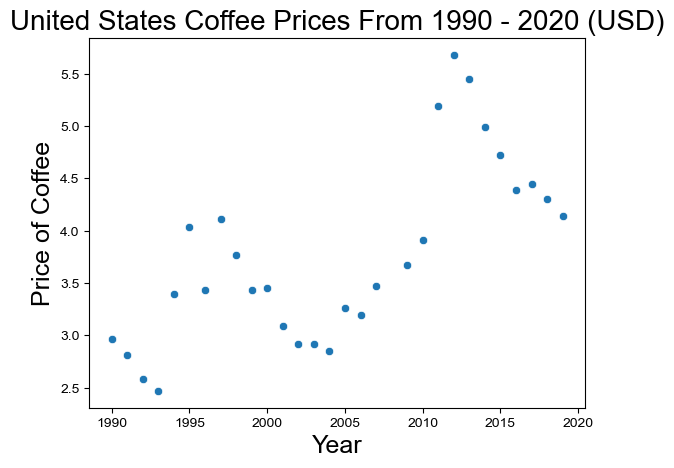

In [8]:
ax = sns.scatterplot(x=retail_prices.year,y=retail_prices.usa)

sns.set(rc={'figure.figsize':(10,6)})

ax.set_title('United States Coffee Prices From 1990 - 2020 (USD)',fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Price of Coffee',fontsize=18);

## Colombia Temperature Changes

In [10]:
# https://www.kaggle.com/datasets/sevgisarac/temperature-change
global_warming_df = pd.read_csv('data/Ethiopia/FAOSTAT_data_1-10-2022.csv')
global_warming_df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


### Global Warming Dataset

In [11]:
# Assigning Colombia as its own DataFrame
colombia_temp_change = global_warming_df[global_warming_df.Area=='Colombia']

In [12]:
# cleaning columns
colombia_temp_change.columns = [col.lower().strip().replace(' ','_') 
 for col in colombia_temp_change.columns]

In [13]:
# grabbing only meterological year as months for easy plotting/visualization
colombia_yearly_temp_change = colombia_temp_change[colombia_temp_change['months']=='Meteorological year'].sort_values(by=['months','year'],ascending=False)

In [14]:
colombia_yearly_temp_change.head()

,domain_code,domain,area_code_(fao),area,element_code,element,months_code,months,year_code,year,unit,value,flag,flag_description
48891,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2020,2020,?C,1.391,Fc,Calculated data
48890,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2019,2019,?C,1.228,Fc,Calculated data
48889,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2018,2018,?C,0.972,Fc,Calculated data
48888,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2017,2017,?C,0.625,Fc,Calculated data
48887,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2016,2016,?C,0.941,Fc,Calculated data


In [15]:
colombia_yearly_temp_change = colombia_yearly_temp_change[['year','value']]

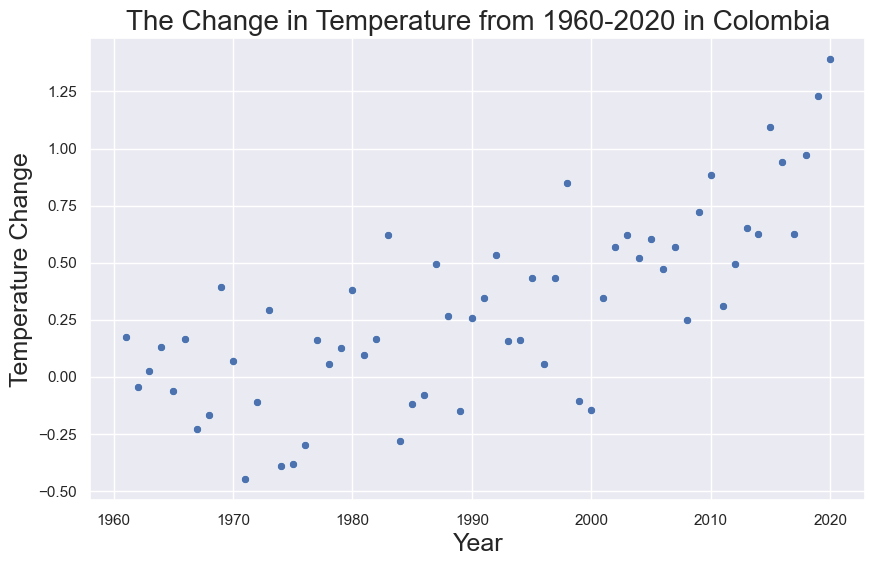

In [16]:
ax = sns.scatterplot(x=colombia_yearly_temp_change.year,
                     y=colombia_yearly_temp_change.value);

sns.set(rc={'figure.figsize':(10,6)})

ax.set_title('The Change in Temperature from 1960-2020 in Colombia',fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Temperature Change',fontsize=18);

### Quick Interpretation:
- There is a clear increase in temperature that is especially prevelant since 2000

## Colombia Production

In [17]:
# reading in and cleaning production dataset
production = pd.read_csv('data/Colombia_data/colombia_production.csv')
production.columns=[col.lower().strip().replace(' ','_').replace('/','_') 
                    for col in production.columns]
production.crop_year = [each[:4] for each in production.crop_year]
production.rename(columns={'crop_year':'year'},inplace=True)

In [18]:
col_production = production
col_production.year = col_production.year.astype(int)

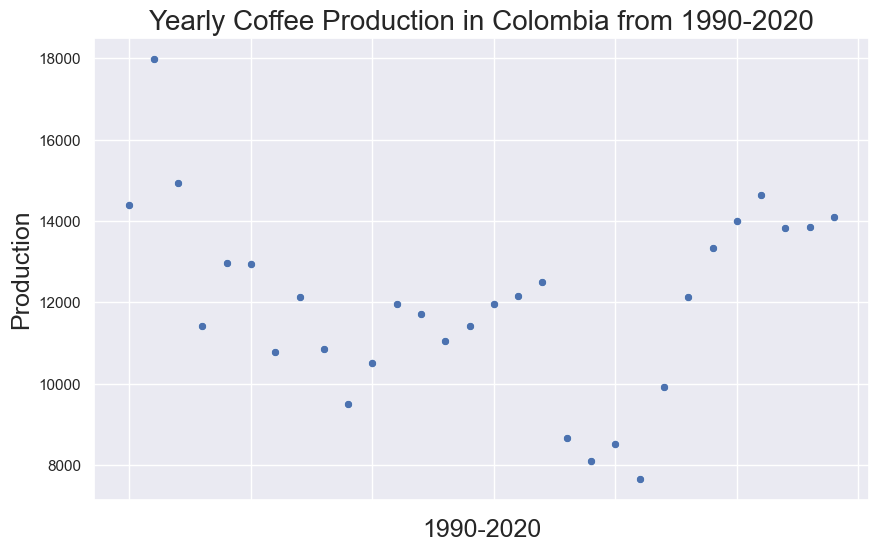

In [19]:
ax = sns.scatterplot(x=production.year,
                     y=production.colombia);

sns.set(rc={'figure.figsize':(10,6)});

ax.set_xticklabels([]);

ax.set_title('Yearly Coffee Production in Colombia from 1990-2020',fontsize=20)
ax.set_xlabel('1990-2020',fontsize=18)
ax.set_ylabel('Production',fontsize=18);

## Global Temperature Change
https://www.climate.gov/maps-data/dataset/global-temperature-anomalies-graphing-tool

In [20]:
global_temp_change = pd.read_csv('data/global_temp_change.csv')
global_temp_change.head()

,year,global_change_in_celsius
0,1980,0.32
1,1981,0.53
2,1982,0.12
3,1983,0.51
4,1984,0.07


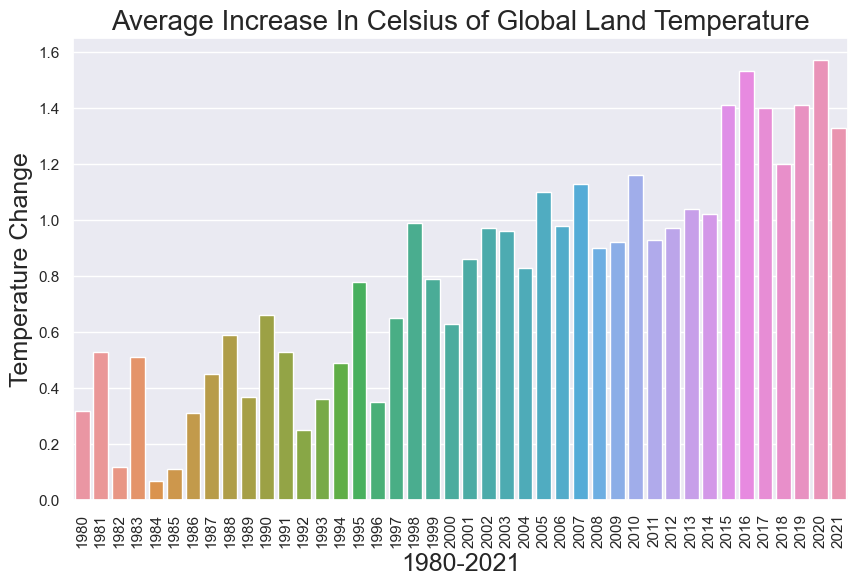

In [21]:
ax = sns.barplot(x=global_temp_change.year,
                 y=global_temp_change.global_change_in_celsius);

sns.set(rc={'figure.figsize':(10,6)});

ax.set_title('Average Increase In Celsius of Global Land Temperature',fontsize=20)
ax.set_xlabel('1980-2021',fontsize=18)
ax.set_ylabel('Temperature Change',fontsize=18);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

## Merged Data

**Dataframes used in this notebook**
- col_coffee_production
- retail_prices - Lara has
- colombia_yearly_temp_change
- col_production
- global_temp_change

In [22]:
col_coffee_production.head()

,year,colombia
0,1991,863760.00
1,1992,1078823.82
2,1993,896812.68
3,1994,685345.32
4,1995,777840.00


In [23]:
colombia_yearly_temp_change.head()

,year,value
48891,2020,1.391
48890,2019,1.228
48889,2018,0.972
48888,2017,0.625
48887,2016,0.941


In [24]:
col_production.head()

,year,colombia
0,1990,14396.000
1,1991,17980.397
2,1992,14946.878
3,1993,11422.422
4,1994,12964.000


In [25]:
global_temp_change.head()

,year,global_change_in_celsius
0,1980,0.32
1,1981,0.53
2,1982,0.12
3,1983,0.51
4,1984,0.07


In [26]:
merge_1 = pd.merge(col_production,global_temp_change,on='year',how='right')

In [27]:
merge_2 = pd.merge(col_coffee_production,colombia_yearly_temp_change,on='year',how='right')

In [28]:
col_capparelli_df = pd.merge(merge_1,merge_2,on='year')

In [29]:
colombia_df = col_capparelli_df.iloc[10:41]

In [30]:
colombia_df.rename(columns={'colombia_x':'col_prod_60kg_bags','colombia_y':'col_annual_crop_yield',
                            'value':'col_annual_celsius_change'},inplace=True)

/var/folders/pj/j8qg9t055bx9yt_m61ngrhyh0000gn/T/ipykernel_12081/239219788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombia_df.rename(columns={'colombia_x':'col_prod_60kg_bags','colombia_y':'col_annual_crop_yield',


In [31]:
colombia_df = colombia_df[['year','col_annual_crop_yield',
                           'col_prod_60kg_bags','col_annual_celsius_change',
                           'global_change_in_celsius']]

In [32]:
# colombia_df.to_csv('data/colombia_capp.csv',index=False)

In [33]:
colombia_df.head()

,year,col_annual_crop_yield,col_prod_60kg_bags,col_annual_celsius_change,global_change_in_celsius
10,1990,NaN,14396.000,0.258,0.66
11,1991,863760.00,17980.397,0.347,0.53
12,1992,1078823.82,14946.878,0.532,0.25
13,1993,896812.68,11422.422,0.157,0.36
14,1994,685345.32,12964.000,0.162,0.49


## Preparing Final DataFrame

In [34]:
df = pd.read_csv('data/full_df.csv')

In [35]:
df.columns = [col.lower().replace(' ','_').replace('(','').replace(')','') for col in df.columns]

In [36]:
#sns.pairplot(df);

In [37]:
df.corr()

,year,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,thousand_units_bags_of_60_kg,b_thousand_usd_grn_coffee_prod,b_annual_avg_temp,col_annual_crop_yield,col_prod_60kg_bags,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption
year,1.000000,-0.561961,0.963339,0.925349,0.684256,0.945257,0.928191,0.809415,-0.082109,-0.037202,0.693510,0.874779,0.962214,0.808343,0.933709,0.995082
b_hectares_harvested,-0.561961,1.000000,-0.520385,-0.320141,-0.606814,-0.485447,-0.285842,-0.474429,-0.097517,0.049573,-0.401712,-0.443627,-0.511797,-0.370582,-0.596514,-0.545957
b_hectograms_per_hectare_yield,0.963339,-0.520385,1.000000,0.968702,0.651410,0.930749,0.951047,0.752136,-0.039969,-0.019055,0.693303,0.816871,0.926718,0.723276,0.923923,0.958395
b_tonnes_produced,0.925349,-0.320141,0.968702,1.000000,0.569298,0.863741,0.986585,0.704591,-0.140639,-0.091639,0.640438,0.788019,0.893233,0.702495,0.876412,0.931135
usa_retail_price,0.684256,-0.606814,0.651410,0.569298,1.000000,0.577373,0.580915,0.519005,-0.343045,-0.110461,0.353769,0.512309,0.622417,0.511986,0.654165,0.699292
thousand_units_bags_of_60_kg,0.945257,-0.485447,0.930749,0.863741,0.577373,1.000000,0.866697,0.758557,0.120753,0.177994,0.688459,0.825335,0.929708,0.710241,0.869034,0.926795
b_thousand_usd_grn_coffee_prod,0.928191,-0.285842,0.951047,0.986585,0.580915,0.866697,1.000000,0.731000,-0.208597,-0.102278,0.584901,0.789799,0.899459,0.734789,0.889618,0.941605
b_annual_avg_temp,0.809415,-0.474429,0.752136,0.704591,0.519005,0.758557,0.731000,1.000000,-0.033978,0.143054,0.853547,0.937997,0.782794,0.832829,0.788673,0.802881
col_annual_crop_yield,-0.082109,-0.097517,-0.039969,-0.140639,-0.343045,0.120753,-0.208597,-0.033978,1.000000,0.721590,0.218547,0.002540,-0.174842,0.038779,-0.202310,-0.223440
col_prod_60kg_bags,-0.037202,0.049573,-0.019055,-0.091639,-0.110461,0.177994,-0.102278,0.143054,0.721590,1.000000,0.299022,0.113391,-0.069782,0.238017,-0.150013,-0.160113


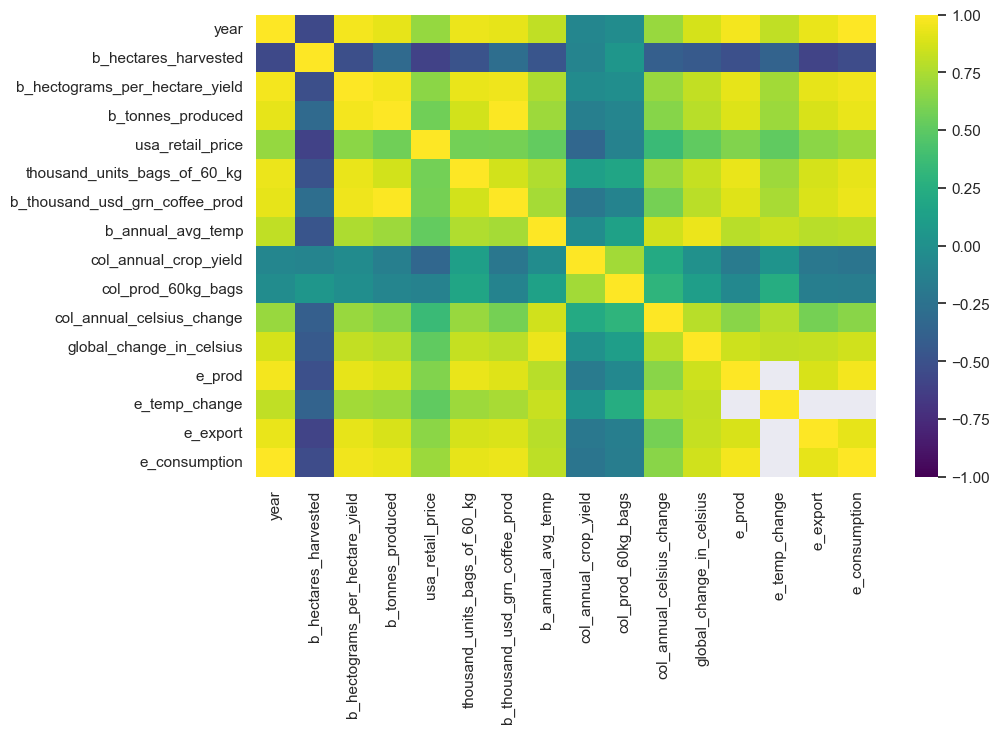

In [38]:
sns.heatmap(df.corr(),cmap='viridis',vmax=1,vmin=-1);

## Preparing Data For Modeling

### Null Values

In [39]:
df.isnull().sum().sort_values(ascending=False).head(10)

e_temp_change                     151
e_consumption                     149
e_prod                            119
e_export                          119
usa_retail_price                   95
thousand_units_bags_of_60_kg       92
b_thousand_usd_grn_coffee_prod     92
b_annual_avg_temp                  92
col_annual_crop_yield              92
col_prod_60kg_bags                 92
dtype: int64

In [40]:
# only 2 values missing, 2008,2020
# the mean works for 2008 because 2007 is the actual mean
# the mean works for 2020 because coffee prices are falling back down towards the mean
# additionally, the mean filling this single value will not throw off any modeling
df.usa_retail_price.fillna(df.usa_retail_price.mean(),inplace=True)

In [41]:
df.isnull().sum().sort_values(ascending=False).head(10)

e_temp_change                     151
e_consumption                     149
e_prod                            119
e_export                          119
thousand_units_bags_of_60_kg       92
b_thousand_usd_grn_coffee_prod     92
b_annual_avg_temp                  92
col_annual_crop_yield              92
col_prod_60kg_bags                 92
b_hectares_harvested               90
dtype: int64

In [42]:
# using the min for temp_change as 1990-1993 are the missing values
# the first of 1994 value is the min
df.e_temp_change.fillna(df.e_temp_change.min(),inplace=True)

In [43]:
# missing value here is for year 2020
# missing value can be imputed using 3rd quantile
# steady rise in value, 3rd quantile is most appropriate over mean or median
df.thousand_units_bags_of_60_kg.fillna(df.thousand_units_bags_of_60_kg.quantile(.75),
                                       inplace=True)

In [44]:
df.head()

,year,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,thousand_units_bags_of_60_kg,b_thousand_usd_grn_coffee_prod,b_annual_avg_temp,col_annual_crop_yield,col_prod_60kg_bags,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption
0,1990,2908960.0,5036.0,1464856.0,2.97,18297.617,1.573783e+06,25.12,NaN,14396.000,0.258,0.66,2909.451,0.244,1074.101,1200.0
1,1990,2908960.0,5036.0,1464856.0,2.97,18297.617,1.573783e+06,25.12,NaN,14396.000,0.258,0.66,2909.451,0.244,1074.101,NaN
2,1991,2763440.0,5502.0,1520382.0,2.81,18661.180,1.633438e+06,25.05,863760.00,17980.397,0.347,0.53,2924.664,0.244,841.329,1264.0
3,1991,2763440.0,5502.0,1520382.0,2.81,18661.180,1.633438e+06,25.05,863760.00,17980.397,0.347,0.53,2924.664,0.244,841.329,NaN
4,1992,2500320.0,5177.0,1294373.0,2.58,18290.453,1.390623e+06,24.91,1078823.82,14946.878,0.532,0.25,1825.171,0.244,734.461,1331.0


In [45]:
df.isnull().sum().sort_values(ascending=False).head(10)

e_consumption                     149
e_prod                            119
e_export                          119
b_thousand_usd_grn_coffee_prod     92
b_annual_avg_temp                  92
col_annual_crop_yield              92
col_prod_60kg_bags                 92
b_hectares_harvested               90
b_hectograms_per_hectare_yield     90
b_tonnes_produced                  90
dtype: int64

In [46]:
# again filling with 75th percentile due to steady increase in production
df.b_thousand_usd_grn_coffee_prod.fillna(df.b_thousand_usd_grn_coffee_prod.quantile(.75),
                                       inplace=True)

In [47]:
df.isnull().sum().sort_values(ascending=False).head(10)

e_consumption                     149
e_prod                            119
e_export                          119
b_annual_avg_temp                  92
col_annual_crop_yield              92
col_prod_60kg_bags                 92
b_hectares_harvested               90
b_hectograms_per_hectare_yield     90
b_tonnes_produced                  90
col_annual_celsius_change          90
dtype: int64

In [48]:
# consistent values makes the mean most appropriate here
df.b_annual_avg_temp.fillna(df.b_annual_avg_temp.mean(),
                            inplace=True)

In [49]:
df.isnull().sum().sort_values(ascending=False).head()

e_consumption            149
e_prod                   119
e_export                 119
col_annual_crop_yield     92
col_prod_60kg_bags        92
dtype: int64

In [50]:
# again earlier years show lower values, using the 25th percentile to fill the single missing value
# is most appropriate
df.col_annual_crop_yield.fillna(df.col_annual_crop_yield.quantile(.25),
                                inplace=True)

In [51]:
df.isnull().sum().sort_values(ascending=False).head()

e_consumption           149
e_prod                  119
e_export                119
col_prod_60kg_bags       92
b_hectares_harvested     90
dtype: int64

In [52]:
# 75th percentile most appropriate to fill missing value due to steady increase in production
# especially towards most recent years
df.col_prod_60kg_bags.fillna(df.col_prod_60kg_bags.quantile(.75),
                             inplace=True)

In [53]:
df.isnull().sum().sort_values(ascending=False).head()

e_consumption                     149
e_prod                            119
e_export                          119
b_hectares_harvested               90
b_hectograms_per_hectare_yield     90
dtype: int64

In [54]:
# 2020 again missing value, 75th percentile remains most appropriate
df.e_prod.fillna(df.e_prod.quantile(.75),inplace=True)

In [55]:
df.isnull().sum().sort_values(ascending=False).head()

e_consumption                     149
e_export                          119
b_hectares_harvested               90
b_hectograms_per_hectare_yield     90
b_tonnes_produced                  90
dtype: int64

In [56]:
# 2020 is the missing value, 75th percentile for same reasons as before
df.e_export.fillna(df.e_export.quantile(.75),inplace=True)

In [57]:
df.isnull().sum().sort_values(ascending=False).head()

e_consumption                     149
b_hectares_harvested               90
b_hectograms_per_hectare_yield     90
b_tonnes_produced                  90
col_annual_celsius_change          90
dtype: int64

In [58]:
# 2020 is the missing value, 75th percentile for same reasons as before
df.e_consumption.fillna(df.e_consumption.quantile(.75),inplace=True)

In [59]:
df.drop(columns=(['b_thousand_usd_grn_coffee_prod','col_annual_crop_yield']),inplace=True)

## Converting Columns and Dropping Unecessary columns

In [60]:
# converting kg to pounds
# creating column to represent change
df['us_consumption_lbs'] = [(each*1000)*2.2 for each in df.thousand_units_bags_of_60_kg]
df.col_prod_60kg_bags = [(each*1000)*2.2 for each in df.col_prod_60kg_bags]

# renaming columning to representing change
df.rename(columns={'col_prod_60kg_bags':'col_production_lbs'},inplace=True)

# dropping unchanged column
df.drop(columns='thousand_units_bags_of_60_kg',inplace=True)

In [61]:
# df.to_csv('data/cleaned_merged_df.csv',index=False)

## Adding Column I forgot to add originally

In [62]:
col_annual_avg_temp = pd.read_csv('data/Colombia_data/tas_timeseries_annual_cru_1901-2021_COL.csv')

In [63]:
df = pd.merge(df,col_annual_avg_temp,on='year')

In [64]:
df.head()

,year,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,col_production_lbs,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius
0,1990,2908960.0,5036.0,1464856.0,2.97,25.12,31671200.0,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77
1,1990,2908960.0,5036.0,1464856.0,2.97,25.12,31671200.0,0.258,0.66,2909.451,0.244,1074.101,3283.0,40254757.4,24.77
2,1991,2763440.0,5502.0,1520382.0,2.81,25.05,39556873.4,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82
3,1991,2763440.0,5502.0,1520382.0,2.81,25.05,39556873.4,0.347,0.53,2924.664,0.244,841.329,3283.0,41054596.0,24.82
4,1992,2500320.0,5177.0,1294373.0,2.58,24.91,32883131.6,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95


In [65]:
# df.to_csv('data/cleaned_merged_df.csv',index=False)

## Final DataFrame Ready For Modeling

In [66]:
coffee_df = pd.read_csv('data/cleaned_merged_df3.csv')

In [67]:
coffee_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [68]:
coffee_df.head()

,year,ind_annual_celcsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,col_production_lbs,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change,e_avg_temp
0,1990,0.120,25.43,16371042.6,2908960,5036,1464856,2.97,25.12,31671200.0,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77,0.440,23.04
1,1991,0.203,25.32,18685031.2,2763440,5502,1520382,2.81,25.05,39556873.4,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82,0.470,23.13
2,1992,0.264,25.28,12252851.6,2500320,5177,1294373,2.58,24.91,32883131.6,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95,0.381,22.79
3,1993,0.206,25.17,14835233.6,2259330,5660,1278759,2.47,25.02,25129328.4,0.157,0.36,2967.004,0.244,1166.778,1402.0,42277701.4,24.80,0.522,22.82
4,1994,0.267,25.25,11809331.6,2097650,6232,1307289,3.40,25.14,28520800.0,0.162,0.49,2762.730,0.599,1475.325,1476.0,38117428.8,24.77,0.612,22.91


In [69]:
coffee_df.isnull().sum().head(2)

year                          0
ind_annual_celcsius_change    0
dtype: int64

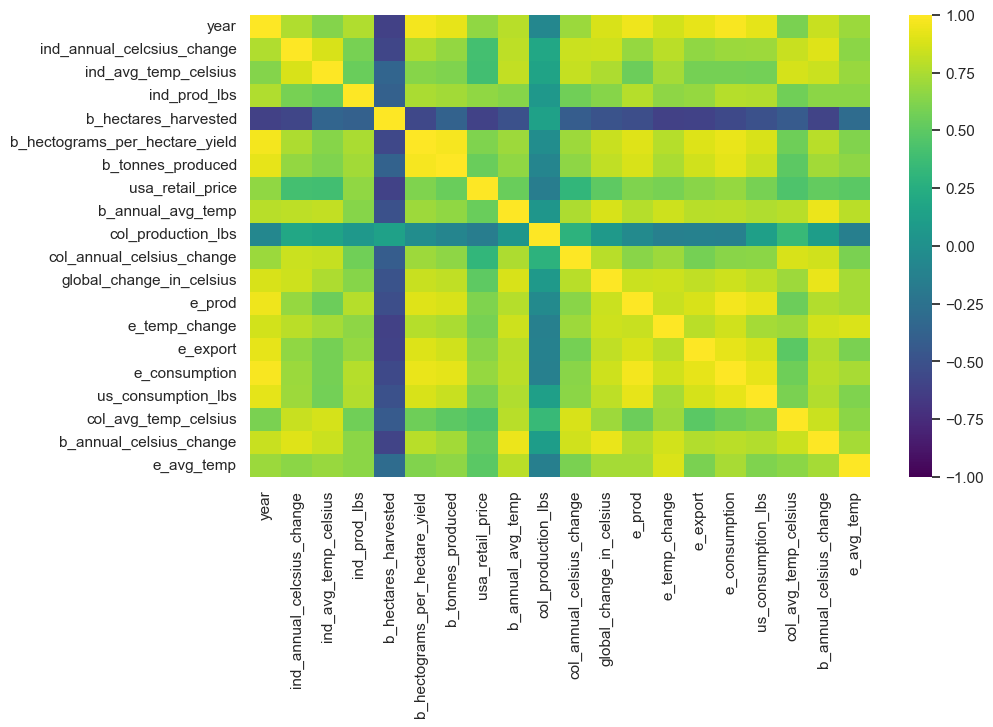

In [70]:
sns.heatmap(coffee_df.corr(),cmap='viridis',vmin=-1);

In [71]:
coffee_df

,year,ind_annual_celcsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,col_production_lbs,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change,e_avg_temp
0,1990,0.120,25.43,1.637104e+07,2908960,5036,1464856,2.970000,25.120,31671200.00,0.258,0.66,2909.451000,0.244,1074.101000,1200.0,40254757.40,24.77,0.440,23.04
1,1991,0.203,25.32,1.868503e+07,2763440,5502,1520382,2.810000,25.050,39556873.40,0.347,0.53,2924.664000,0.244,841.329000,1264.0,41054596.00,24.82,0.470,23.13
2,1992,0.264,25.28,1.225285e+07,2500320,5177,1294373,2.580000,24.910,32883131.60,0.532,0.25,1825.171000,0.244,734.461000,1331.0,40238996.60,24.95,0.381,22.79
3,1993,0.206,25.17,1.483523e+07,2259330,5660,1278759,2.470000,25.020,25129328.40,0.157,0.36,2967.004000,0.244,1166.778000,1402.0,42277701.40,24.80,0.522,22.82
4,1994,0.267,25.25,1.180933e+07,2097650,6232,1307289,3.400000,25.140,28520800.00,0.162,0.49,2762.730000,0.599,1475.325000,1476.0,38117428.80,24.77,0.612,22.91
5,1995,0.344,25.31,1.006154e+07,1869980,4974,930135,4.040000,25.270,28463639.60,0.431,0.78,3165.322000,0.815,1276.118000,1555.0,38198316.20,24.97,0.781,23.11
6,1996,0.387,25.26,1.808528e+07,1920250,7130,1369196,3.430000,25.050,23713470.00,0.057,0.35,3407.442000,0.775,1838.231000,1637.0,39729800.00,24.63,0.506,23.14
7,1997,0.397,25.52,1.676571e+07,1988190,6179,1228513,4.110000,25.280,26669491.20,0.431,0.65,3056.864000,0.713,1979.733000,1724.0,39149983.40,25.01,0.694,23.13
8,1998,0.997,25.89,1.605110e+07,2070410,8160,1689366,3.770000,25.680,23909516.40,0.848,0.99,2927.725000,0.806,1917.061000,1816.0,40928357.80,25.30,1.282,23.38
9,1999,0.265,25.13,1.442555e+07,2222925,7341,1631852,3.430000,25.150,20926940.98,-0.105,0.79,3784.051000,0.314,1818.087000,1912.0,42590741.60,24.46,0.602,22.82


## Baselines

In [73]:
# will use features to determine how clearly climate change and coffee trends 
# indicate whether it is before or after 2005
coffee_df['year_target'] = [1 if each > 2005 else 0 for each in coffee_df.year]

In [74]:
coffee_df.year_target.value_counts(normalize=True)
# 51 / 48 split, 51 percent of the years in the data is before 2005, 48% is after

0    0.516129
1    0.483871
Name: year_target, dtype: float64

In [75]:
# checking correlations
# noticing strong linear relationships to the year_target
coffee_df.corr().year_target.sort_values(ascending=False)

year_target                       1.000000
e_consumption                     0.897207
e_prod                            0.877763
year                              0.866025
b_hectograms_per_hectare_yield    0.838737
b_tonnes_produced                 0.826024
us_consumption_lbs                0.806648
e_export                          0.804101
ind_prod_lbs                      0.742912
global_change_in_celsius          0.705768
e_temp_change                     0.697478
usa_retail_price                  0.681302
b_annual_celsius_change           0.621366
b_annual_avg_temp                 0.612360
e_avg_temp                        0.611233
col_annual_celsius_change         0.560931
ind_annual_celcsius_change        0.522092
col_avg_temp_celsius              0.454519
ind_avg_temp_celsius              0.393484
col_production_lbs               -0.106655
b_hectares_harvested             -0.470946
Name: year_target, dtype: float64

In [76]:
# will model to see if climate change and other country coffee features
# can accurately predict whether or not the retail price of coffee will rise above or fall below the mean
coffee_df['retail_target'] = [1 if each > coffee_df.usa_retail_price.mean() else 0 
                              for each in  coffee_df.usa_retail_price]

In [77]:
coffee_df.retail_target.value_counts(normalize=True)
# 51 % of prices in the data are below the mean, 48% are above
# mean = 3.67

0    0.580645
1    0.419355
Name: retail_target, dtype: float64

In [78]:
# checking correlations
# noticing strong linear relationships to the price_target
coffee_df.corr().retail_target.sort_values(ascending=False)

retail_target                     1.000000
usa_retail_price                  0.815697
col_avg_temp_celsius              0.626078
b_annual_avg_temp                 0.623011
b_annual_celsius_change           0.571759
e_export                          0.556577
ind_avg_temp_celsius              0.551392
us_consumption_lbs                0.548861
e_consumption                     0.524786
e_temp_change                     0.513608
year                              0.511617
ind_annual_celcsius_change        0.502980
year_target                       0.485271
global_change_in_celsius          0.475032
e_prod                            0.467053
ind_prod_lbs                      0.465930
b_hectograms_per_hectare_yield    0.464947
col_annual_celsius_change         0.456366
e_avg_temp                        0.414473
b_tonnes_produced                 0.352360
col_production_lbs                0.035755
b_hectares_harvested             -0.619652
Name: retail_target, dtype: float64

## Train Test Split: Model 1
- Model 1 will use a logistic regression on our newly created year_target
- The goal is to use features from the data and predict whether or not the year is before or after 2005 (median)

In [79]:
# train test split
X = coffee_df[['b_hectares_harvested','usa_retail_price',
               'col_production_lbs','ind_avg_temp_celsius','e_temp_change']]
y = coffee_df.year_target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [80]:
# scaling data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [81]:
# fitting and scoring
lreg = LogisticRegression(max_iter=500)
lreg.fit(X_train_ss,y_train)
lreg.score(X_train_ss,y_train),lreg.score(X_test_ss,y_test)

(0.8695652173913043, 0.875)

In [82]:
cross_val_score(lreg,X_train_ss,y_train)

array([0.8 , 0.8 , 1.  , 0.75, 0.75])

In [83]:
misclass = X_test_ss.copy()
misclass = pd.DataFrame(misclass)
misclass['actual'] = coffee_df.year_target
misclass['predicted'] = lreg.predict(X_test_ss)
misclass

,0,1,2,3,4,actual,predicted
0,0.291337,-0.415025,-0.731375,-0.755217,-0.877260,0,0
1,0.277184,-0.390176,0.101312,-0.797686,-0.148897,0,0
2,-0.107507,0.156506,-1.564457,1.240845,0.942323,0,1
3,0.259491,-1.632634,-0.354586,-1.519666,-1.745998,0,0
4,-0.381297,2.069893,-0.061837,0.603804,0.807245,0,1
5,-0.990615,-0.439874,-0.623104,-1.137442,-0.339596,0,0
6,0.670789,-1.073528,-0.233749,1.113437,0.505305,0,0
7,-1.425036,0.827434,0.647457,0.264049,1.485285,0,1


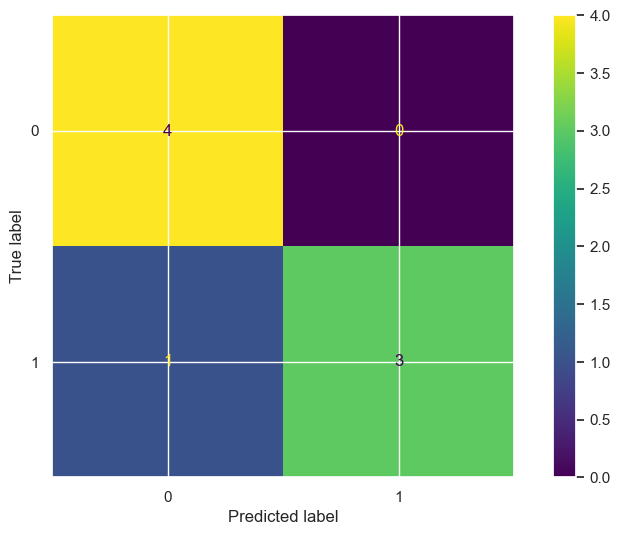

In [84]:
ConfusionMatrixDisplay.from_estimator(lreg, X_test_ss, y_test); 

In [85]:
precision = 4 / (4 + 0)
recall = 4 / (4 + 1)
f1 = 2*(precision*recall) / (precision+recall)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 1.0
Recall: 0.8
F1 Score: 0.888888888888889


## Interpretation Model 1 - Year Target:
- A training accuracy of 0.869 (87%) and a testing accuracy of 0.875 (88%) indicates that the model is performing relatively well with no indication of overfitting or underfitting.
- This logistic regression model has a precision of 100%. When predicting the year as before 2005 the model did not misclassify any predictions.
- A recall of 80% demonstrates that of all predictions past the year 2005, the model was correct 80% of the time.
- This model performs better when predicting years prior to 2006. Which means the earlier years in this data are more consistent in terms of data representation for modeling.

## Train Test Split Model 2:
- Model 2 will use logistic regression on our newly created retail_target
- The goal is to use features and predict whether or not the retail price of coffee will rise above or fall below the mean price of U.S coffee (1990-2020)

In [86]:
X = coffee_df[['year','global_change_in_celsius','us_consumption_lbs',
               'b_hectares_harvested','e_avg_temp','col_production_lbs']]
y = coffee_df.retail_target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [87]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [88]:
lreg = LogisticRegression(max_iter=500)
lreg.fit(X_train_ss,y_train)
lreg.score(X_train_ss,y_train),lreg.score(X_test_ss,y_test)

(0.782608695652174, 0.75)

In [89]:
cross_val_score(lreg,X_train_ss,y_train)

array([0.8 , 1.  , 0.6 , 0.5 , 0.75])

## Misclassification Retail Price

In [90]:
misclass = X_test_ss.copy()
misclass = pd.DataFrame(misclass)
misclass['actual'] = coffee_df.retail_target
misclass['predicted'] = lreg.predict(X_test_ss)
misclass

,0,1,2,3,4,5,actual,predicted
0,-0.830251,-0.772192,-1.160255,-0.640693,-0.743095,-0.118138,0,0
1,0.185482,0.517521,-0.063622,0.342333,-0.173389,0.053845,0,0
2,-0.220811,0.060747,-0.348326,0.810343,0.246395,-0.586805,0,0
3,0.896494,0.221961,0.862276,-0.606361,0.366333,0.412285,0,1
4,-0.627104,-0.396026,-0.630543,0.195545,-1.672616,-1.261582,0,0
5,0.591774,-0.019860,0.278669,-0.068613,0.576225,-2.075896,1,0
6,-0.017665,0.436914,-0.075723,0.562462,0.366333,-0.192694,0,0
7,-0.525531,-0.825930,-0.838456,0.356009,-0.683126,-0.820410,1,0


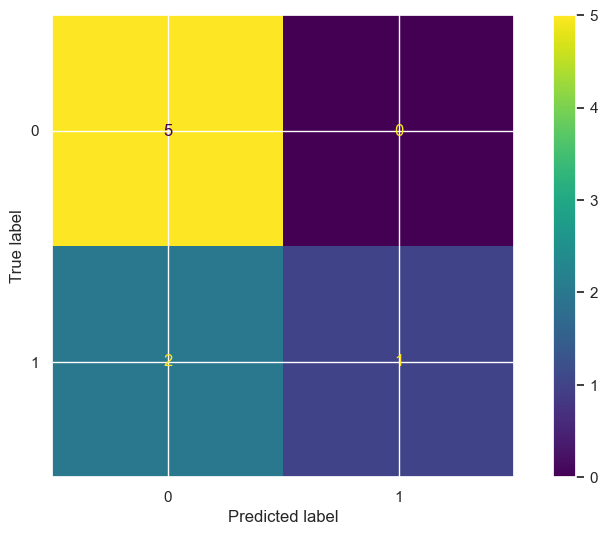

In [91]:
ConfusionMatrixDisplay.from_estimator(lreg, X_test_ss, y_test); 

In [92]:
precision = 5 / (5 + 0)
recall = 5 / (5 + 1)
f1 = 2*(precision*recall) / (precision+recall)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091


## Interpretation Model 2 - Price Target:
- A training accuracy of 0.78 (78%) and a testing accuracy of 0.75 (75%) indicates that the model is slightly overfit however is performing relatively well.
- This logistic regression model has a precision of 100%. When predicting the U.S retail price to fall below the target, the model did not misclassify any predictions.
- A recall of 83% demonstrates that of all predictions made above the target, the model was correct 83% of the time.

- The data / features have high multicollinearity among itself and when looking at the correlation of the target, there are several features with a strong linear relationship as well. A problem I had with this model was getting it to not overfit but also include features from all countries. When incorporating more than one feature from the same country, the model would then become vastly overfit. Additionally, if the model had features with high multicollinearity between countries, such as production levels across multiple countries, the model again would become vastly overfit.

- This model is a little bit better at predicting when the price of coffee is below the mean than above it, which means the earlier years in this data are better predicted than the later years. The mean price of coffee in the U.S is $3.67 which is reached during 2007 - 2008